In [3]:
import tensorflow as tf
print(tf.__version__)  # Check TensorFlow version
print(tf.config.list_physical_devices('GPU'))  # Check available GPUs


2.18.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [46]:
## import some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
dataset = pd.read_csv("Churn_Modelling.csv")
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [48]:
##This dataset has 10000 rows and 14 columns, In the our problem statement is to predict wheather the customer will exit from the bank or not. Here Excited is the Dependent Variable and others are independent variables.

In [49]:
## Divide the dataset into Dependent and Independent features.
## Since the rowno.,name,customerId is not usefull we will ignore these columns.

X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [50]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [51]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [52]:
## feature Engineering
geography=pd.get_dummies(X["Geography"], dtype=int, drop_first=True)
gender= pd.get_dummies(X["Gender"],dtype=int, drop_first=True)


In [53]:
## concatenate these variable with dataframe
X=X.drop(['Geography','Gender'], axis=1)

In [54]:
X=pd.concat([X,geography,gender],axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [55]:
#Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state= 0)

In [56]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [57]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [58]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [59]:
X_train.shape

(8000, 11)

In [60]:
## Part 2 now lets create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [61]:
#Sequential used for forward and backword propagation
#Dense is used to create the hidden layer, input layer and the output layer
# Used the activation func
#Dropout layer is used as regularizaton parameter, while performing the procedure 30 percent of the neurons will get deactivated so we need to cutoff the neural connection.

In [62]:
### Let's intialize the ANN
classifier = Sequential()


In [89]:
## Adding the input layer
## We have 11 columns so we will have 11 nodes as units
classifier.add(Dense(units=11, activation='relu',input_shape=(X_train.shape[1],)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [113]:
## Adding the first hidden layer and using dropout func
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.3))

In [91]:
## adding the second hidden layer

classifier.add(Dense(units=6, activation='relu'))

In [92]:
## Adding the output layer
# As this is out output layer we want only 1 neuron and its a binary classification so we are using sigmoid activation func
classifier.add(Dense(1, activation= 'sigmoid'))

In [93]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#By defualt adam optimiser gives the learning rate as 0.01. If you want to provide your learnig rate use the below codes

In [94]:
# For your own learnig rate
import tensorflow
optimiser=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [97]:
## Early stopping(Its is basically used when our model is performed and and acc is not increasing so early stopping func automaticlly stop the epochs)
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [98]:
model_history= classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100, callbacks=early_stopping)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8570 - loss: 0.3874 - val_accuracy: 0.8236 - val_loss: 0.4373
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8571 - loss: 0.3794 - val_accuracy: 0.8236 - val_loss: 0.4435
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8673 - loss: 0.3628 - val_accuracy: 0.8239 - val_loss: 0.4357
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8639 - loss: 0.3776 - val_accuracy: 0.8239 - val_loss: 0.4367
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8605 - loss: 0.3849 - val_accuracy: 0.8194 - val_loss: 0.4447
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8631 - loss: 0.3714 - val_accuracy: 0.8190 - val_loss: 0.4467
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8677 - loss: 0.3625 - val_accuracy: 0.8213 - val_loss: 0.4466
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8656 - loss: 0.3709 - val_accu

In [99]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

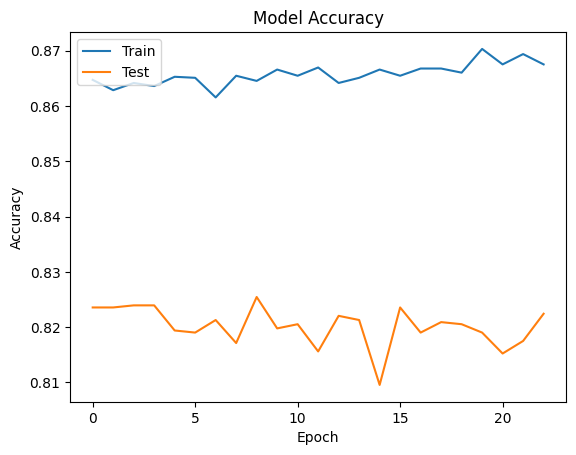

In [101]:
#Summary for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

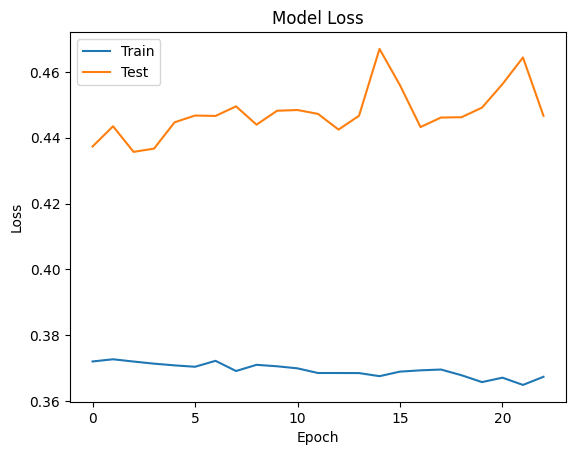

In [102]:
#Summry histroy for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [107]:
# Part 3 - making the prediction and evaluating the model
 # predicting the test set result
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [108]:
# make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1502,   93],
       [ 245,  160]])

In [109]:
## calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.831

In [112]:
## Get the weights
classifier.get_weights()

[array([[-1.83103085e-01, -1.62534431e-01,  9.99146327e-02,
          4.32031341e-02,  3.26270908e-02, -5.93720190e-02,
          3.98901552e-02, -6.35925829e-01, -3.55246037e-01,
          4.22136009e-01, -5.59306657e-03,  2.36201882e-02,
         -3.06854874e-01,  9.69654769e-02,  3.21053773e-01,
         -1.54727399e-01, -1.36958763e-01,  1.40494883e-01,
         -1.57964067e-03, -2.97828615e-01, -1.75067976e-01,
         -4.06870335e-01, -2.69616604e-01,  5.16063496e-02,
         -6.27199188e-02,  4.17058945e-01, -4.07024622e-01,
          9.47439391e-03,  1.72342300e-01, -7.87599012e-02,
         -2.08934665e-01,  6.60303906e-02, -4.51398164e-01,
          7.38178641e-02, -4.62648600e-01, -1.44485071e-01,
          2.27301136e-01, -3.45628530e-01,  1.09137215e-01,
          8.36398661e-01, -1.62953943e-01,  7.46884048e-02,
          1.35874733e-01, -1.91286132e-01,  4.12124535e-03,
          3.27623822e-02,  3.11412603e-01, -1.65558606e-01,
          3.62962782e-01, -2.37076744e-0